In [ ]:
import pandas as pd

# Load the dataset from the CSV file
file_path = 'heart_disease.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and basic information
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


(   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
 0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
 1   41  Male  atypical angina       135   203  False          normal     132   
 2   57  Male     asymptomatic       140   192  False          normal     148   
 3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
 4   57  Male     asymptomatic       110   201  False          normal     126   
 
    exang  oldpeak        slope          thal  num  
 0  FALSE      2.3  downsloping  fixed defect    0  
 1  FALSE      0.0         flat  fixed defect    0  
 2  FALSE      0.4         flat  fixed defect    0  
 3  FALSE      0.0         flat  fixed defect    0  
 4   TRUE      1.5         flat  fixed defect    0  ,
 None)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Encoding categorical variables
categorical_columns = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['oldpeak'] = imputer.fit_transform(data[['oldpeak']])

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the first few rows of the processed dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,True,0,0.524183,0,1.334996,0,0,0
1,-1.397560,1,1,0.076967,0.013526,False,1,-0.147705,0,-0.844594,1,0,0
2,0.350503,1,0,0.322181,-0.084656,False,1,0.449529,0,-0.465535,1,0,0
3,-0.195767,1,3,-0.756760,-0.138211,False,0,2.017268,0,-0.844594,1,0,0
4,0.350503,1,0,-1.149102,-0.004325,False,1,-0.371668,1,0.576878,1,0,0


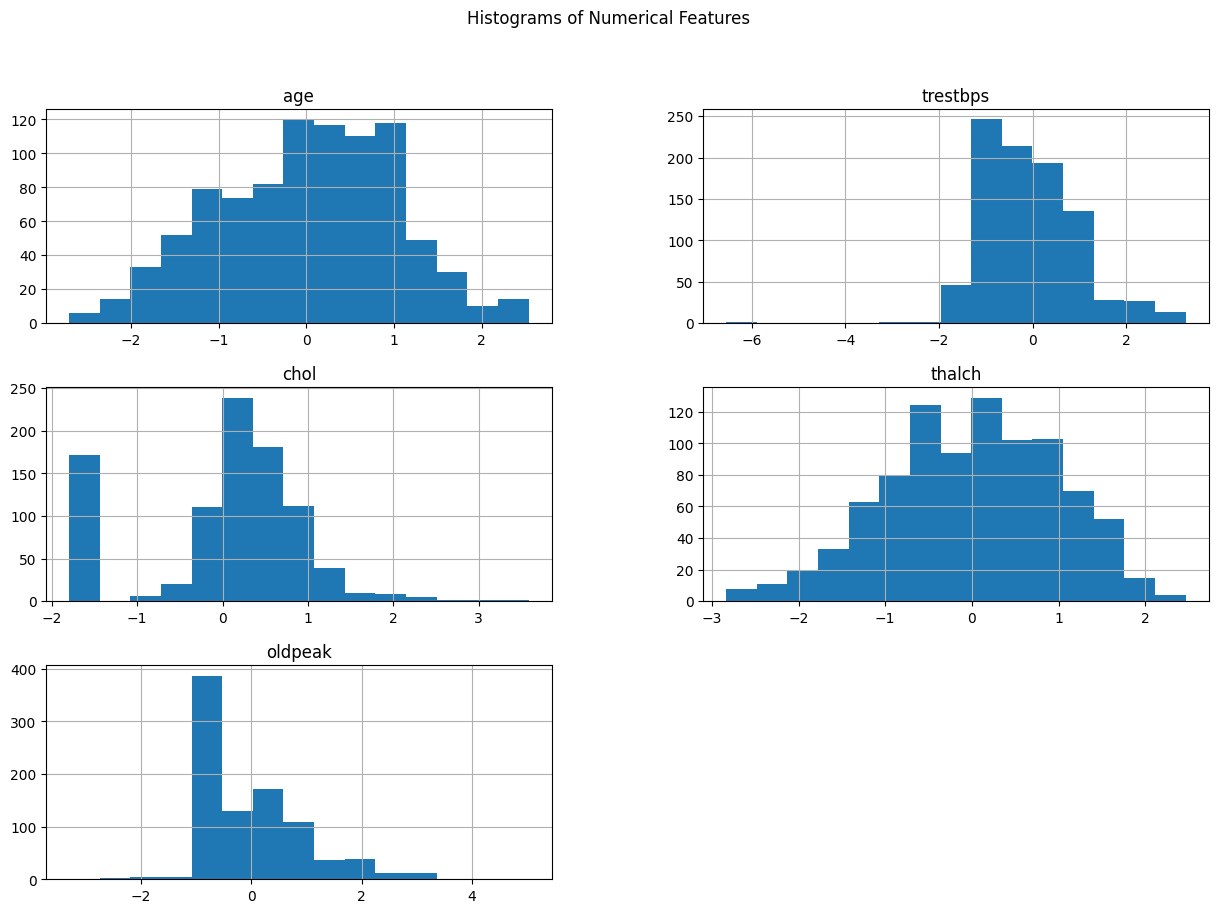

In [ ]:
# Histograms
data[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numerical Features')
plt.show()

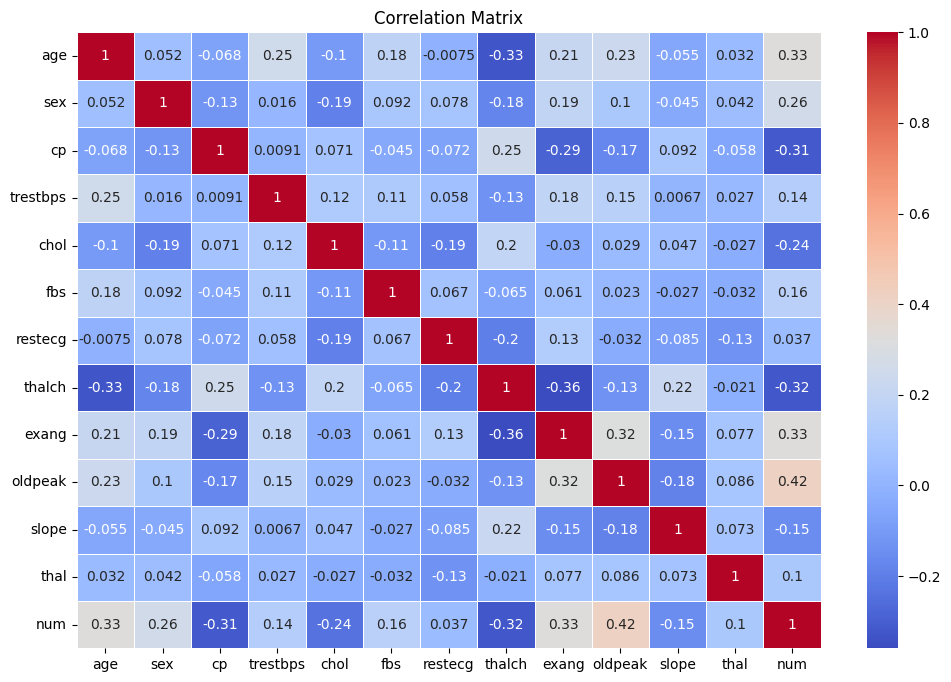

In [ ]:
 #Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Split the dataset into features and target variable
X = data.drop('num', axis=1)
y = data['num']


In [ ]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test), multi_class='ovr')

In [ ]:
# Get the classification report
class_report = classification_report(y_test, y_pred)

accuracy, precision, recall, f1, roc_auc, class_report

(0.4945054945054945,
 0.4838907573604791,
 0.4945054945054945,
 0.488898989285508,
 0.5791486061507294,
 '              precision    recall  f1-score   support\n\n           0       0.70      0.72      0.71        89\n           1       0.34      0.33      0.34        48\n           2       0.36      0.41      0.38        22\n           3       0.07      0.06      0.06        17\n           4       0.00      0.00      0.00         6\n\n    accuracy                           0.49       182\n   macro avg       0.30      0.30      0.30       182\nweighted avg       0.48      0.49      0.49       182\n')

Initial Model Evaluation
The initial Decision Tree model has the following performance metrics on the test set:

Accuracy: 49.45%

Precision: 48.39%

Recall: 49.45%

F1-score: 48.89%

ROC-AUC: 57.91%

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [ ]:
# Evaluate the best model
y_pred_best = best_estimator.predict(X_test)

# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_estimator.predict_proba(X_test), multi_class='ovr')

# Get the classification report
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy: {accuracy_best}")
print(f"Precision: {precision_best}")
print(f"Recall: {recall_best}")
print(f"F1-score: {f1_best}")
print(f"ROC-AUC: {roc_auc_best}")
print(f"Classification Report:\n{class_report_best}")

Accuracy: 0.5714285714285714
Precision: 0.4800292813784487
Recall: 0.5714285714285714
F1-score: 0.521714462059831
ROC-AUC: 0.7399257768280598
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78        89
           1       0.43      0.50      0.46        48
           2       0.00      0.00      0.00        22
           3       0.21      0.24      0.22        17
           4       0.00      0.00      0.00         6

    accuracy                           0.57       182
   macro avg       0.27      0.32      0.29       182
weighted avg       0.48      0.57      0.52       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

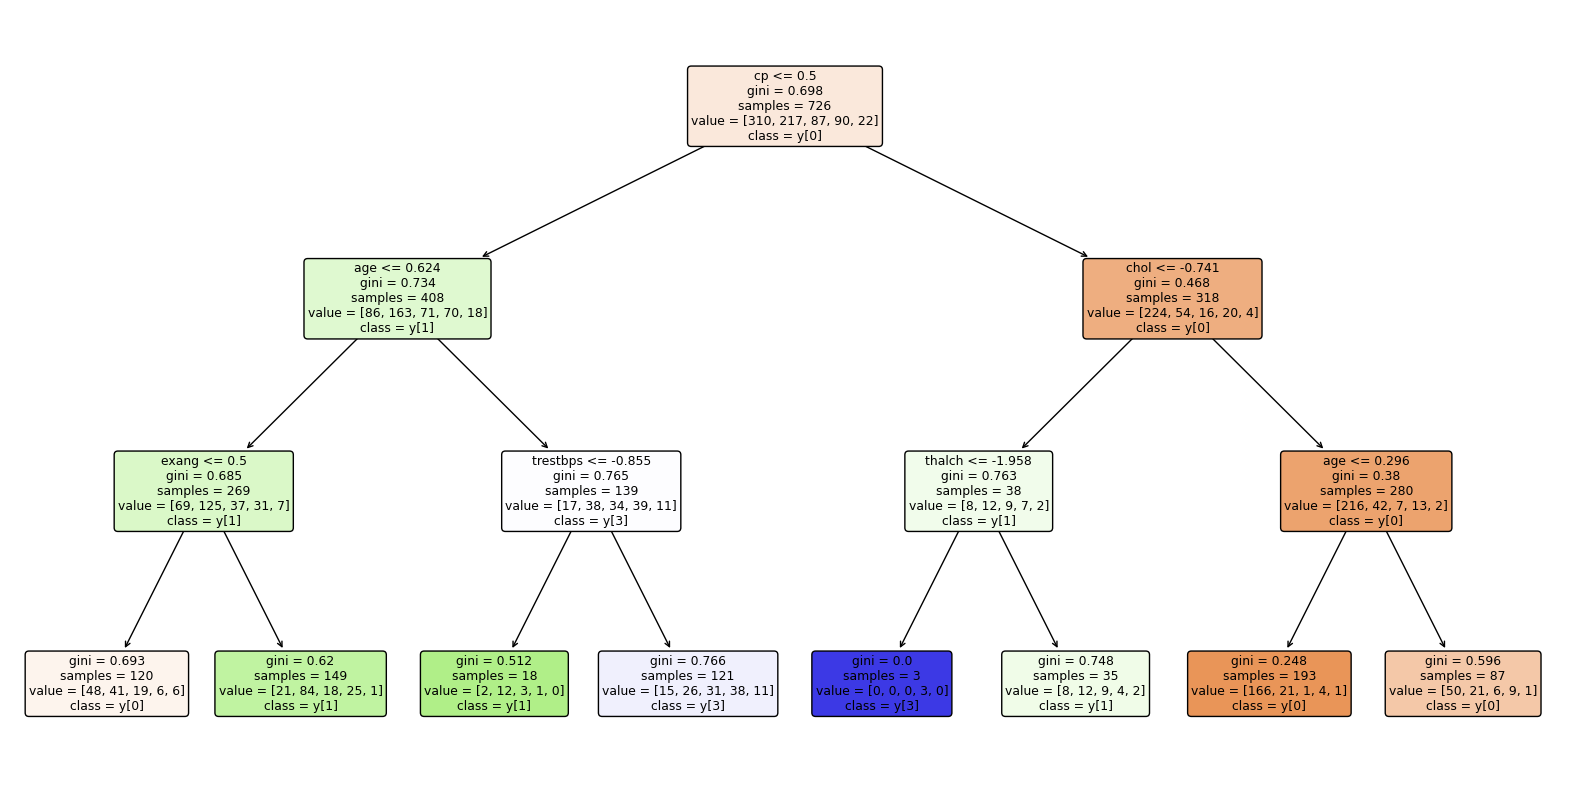

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_estimator, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

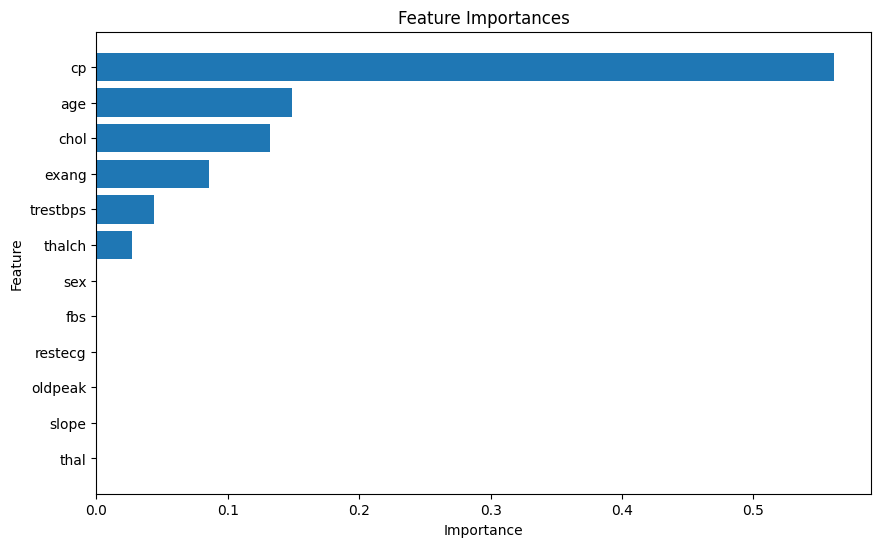

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = best_estimator.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

**Common Hyperparameters Of Decision Tree**
**Models And Their Effects**

**Max Depth:** Specifies the maximum depth of the tree

*Effect*: A shallow tree (low 'max_depth') may underfit the data, capturing  insufficient patterns, while a very deep tree(high'max_depth') may overfit, capturing noise along with the patterns.


**Min Samples Split:**
The minimum number of samples required to split an internal node.

*Effect:* Higher values can prevent the model from learning overly specific patterns (overfitting) by requiring more data to create splits. Lower values might lead to overfitting.

**Min Samples Leaf:**
The minimum number of samples that must be present in a leaf node.

*Effect:* Similar to min_samples_split, higher values help reduce overfitting by ensuring that leaf nodes have enough data.


**Max Features:** The number of features to consider when looking for the best split.

*Effect:* Limiting the number of features considered can help reduce overfitting and improve generalization, especially in high-dimensional datasets.

**Criterion (criterion):**
 The function to measure the quality of a split. Common options include "gini" for the Gini impurity and "entropy" for information gain.

*Effect:* Different criteria can affect the structure of the tree and the types of splits it prefers. "Gini" often results in simpler trees, while "entropy" can lead to more complex trees.

**Max Leaf Nodes:**
 The maximum number of leaf nodes in the tree.

*Effect:* Limiting the number of leaf nodes can prevent overfitting by simplifying the model.

**Min Impurity Decrease:**
 A node will be split if this split induces a decrease in the impurity greater than or equal to this value.

*Effect*: This parameter can help control tree growth by requiring a minimum improvement in impurity for a split to be considered.

**2. Difference Between Label Encoding and** **One-Hot Encoding**

**Label Encoding**:
 Converts categorical labels into numeric values (integers). Each unique category is assigned an integer.

Example: If a column has categories ["red", "blue", "green"], they might be encoded as [0, 1, 2].

Usage: Often used when the categorical variable is ordinal (has a meaningful order, e.g., ["low", "medium", "high"]).

Pros: Simple and compact representation.

Cons: Can be misinterpreted by algorithms as having a numerical relationship/order which might not exist for non-ordinal categories.

**One-Hot Encoding:**Converts categorical variables into a series of binary columns. Each category is represented by a binary column, with a 1 indicating the presence of the category and 0 indicating its absence.

Example: For the same column ["red", "blue", "green"], one-hot encoding creates three columns: red, blue, and green. A value of blue would be represented as [0, 1, 0].

Usage: Commonly used for non-ordinal categorical variables where no order is implied.

Pros: Avoids the problem of implying ordinality where none exists. Makes the data more suitable for algorithms that cannot handle categorical data directly.

Cons: Can lead to a high-dimensional feature space if there are many unique categories, potentially causing computational inefficiency and the "curse of dimensionality".